<a href="https://colab.research.google.com/github/ANAVDUTT/Analyzing-Pump-and-Dump-Schemes/blob/main/Copy_of_ts_pump_dump_explore_20220505.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
# [INPUT REQUIRED]: Authorize access to Google gDrive

# Connect this Notebook to your permanent Google Drive
#   so all generated output is saved to permanent storage there

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("Attempting to attach your Google gDrive to this Colab Jupyter Notebook")
  drive.mount('/gdrive', force_remount=True)
else:
  print("Your Google gDrive is attached to this Colab Jupyter Notebook")

Attempting to attach your Google gDrive to this Colab Jupyter Notebook
Mounted at /gdrive


In [ ]:
%cd /gdrive/MyDrive/Code/senior_seminar/
!ls -altr

/gdrive/MyDrive/Code/senior_seminar
total 314230
-rw------- 1 root root      5592 Oct  7  2020  catfish.csv
-rw------- 1 root root      9186 Mar  9  2021  TimeSeriesExpedia.csv
-rw------- 1 root root    936364 Mar 15  2021  Anomaly_Detection.ipynb
-rw------- 1 root root    208250 Sep 29  2021  BTC-USD.csv
-rw------- 1 root root       143 Oct  4  2021 'Project notes.gdoc'
-rw------- 1 root root     41774 Nov  5  2021  10yrUSTreas.csv
-rw------- 1 root root     66808 Nov  5  2021  SP_500.csv
-rw------- 1 root root    681662 Nov 15 17:54 'bitcoin-price-prediction-arima-xgboost-lstm-fbprop (1).ipynb'
-rw------- 1 root root 317526599 Nov 25 18:40  BTC.csv
-rw------- 1 root root    133058 Dec  6 17:06  TSLA.csv
-rw------- 1 root root    154711 Dec  6 17:21  NSDQ.csv
-rw------- 1 root root   1646919 Feb 28 02:24 'Copy of Bitcoin Forecasting'
-rw------- 1 root root     15427 Apr 27 16:01  SIMPLXPAP_BO.csv
-rw------- 1 root root     16109 Apr 28 17:42  7NR.BO.csv
-rw------- 1 root root     8289

In [ ]:
# Core Python Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10) # plt.rcParamsDefault["figure.figsize"]

import ipywidgets as widgets

import plotly.express as px 
import plotly.graph_objs as go

from statsmodels.nonparametric.smoothers_lowess import lowess

from scipy.signal import chirp, find_peaks, peak_widths, peak_prominences


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
!ls -1 *.csv

10yrUSTreas.csv
7NR.BO.csv
ADANIPOWER_NS.csv
ADINATH_BO.csv
BALFC_BO.csv
BTC.csv
BTC-USD.csv
catfish.csv
NSDQ.csv
SIMPLXPAP_BO.csv
SP_500.csv
TimeSeriesExpedia.csv
TSLA.csv
TTML_NS.csv


In [ ]:
# Only run once

# !unzip features_15S.csv.gz

In [ ]:
!ls -altr data_samples

ls: cannot access 'data_samples': No such file or directory


# Read Datafile

## Read Raw Data

In [ ]:
!ls -altr

total 314230
-rw------- 1 root root      5592 Oct  7  2020  catfish.csv
-rw------- 1 root root      9186 Mar  9  2021  TimeSeriesExpedia.csv
-rw------- 1 root root    936364 Mar 15  2021  Anomaly_Detection.ipynb
-rw------- 1 root root    208250 Sep 29  2021  BTC-USD.csv
-rw------- 1 root root       143 Oct  4  2021 'Project notes.gdoc'
-rw------- 1 root root     41774 Nov  5  2021  10yrUSTreas.csv
-rw------- 1 root root     66808 Nov  5  2021  SP_500.csv
-rw------- 1 root root    681662 Nov 15 17:54 'bitcoin-price-prediction-arima-xgboost-lstm-fbprop (1).ipynb'
-rw------- 1 root root 317526599 Nov 25 18:40  BTC.csv
-rw------- 1 root root    133058 Dec  6 17:06  TSLA.csv
-rw------- 1 root root    154711 Dec  6 17:21  NSDQ.csv
-rw------- 1 root root   1646919 Feb 28 02:24 'Copy of Bitcoin Forecasting'
-rw------- 1 root root     15427 Apr 27 16:01  SIMPLXPAP_BO.csv
-rw------- 1 root root     16109 Apr 28 17:42  7NR.BO.csv
-rw------- 1 root root     82891 May  2 23:14  BALFC_BO.csv
-rw----

In [ ]:
"""
!mv SIMPLXPAP.BO.csv SIMPLXPAP_BO.csv
!mv BALFC.BO.csv BALFC_BO.csv
!mv ADANIPOWER.NS.csv ADANIPOWER_NS.csv
"""

'\n!mv SIMPLXPAP.BO.csv SIMPLXPAP_BO.csv\n!mv BALFC.BO.csv BALFC_BO.csv\n!mv ADANIPOWER.NS.csv ADANIPOWER_NS.csv\n'

In [ ]:
# Stock Details

# stock_name = 'ADANIPOWER_NS'
# stock_name = 'BALFC_BO'
# stock_name = 'SIMPLXPAP_BO'

stock_ts_ls = ['7NR_BO','ADANIPOWER_NS','ADINATH_BO','AGROPHOS_NS','BALFC_BO','BANASFN_BO','SIMPLXPAP_BO','TTML_NS', 'TSLA']
stock_name = stock_ts_ls[3]

stock_datafile = f'{stock_name}.csv'
# stock_datapath = f'./data_samples/{stock_datafile}'
stock_datapath = f'./{stock_datafile}'

In [ ]:
stock_drop = widgets.Dropdown(
    options=stock_ts_ls,
    value=stock_ts_ls[0],
    description='Stock:',
    disabled=False,
)

print(f'Select one of the following Stock Time Series to analyze:')
stock_drop

Select one of the following Stock Time Series to analyze:


Dropdown(description='Stock:', options=('7NR_BO', 'ADANIPOWER_NS', 'ADINATH_BO', 'AGROPHOS_NS', 'BALFC_BO', 'B…

In [ ]:
stock_name = stock_drop.value
print(f'Analyzing Stock: {stock_name}')

stock_datafile = f'{stock_name}.csv'
# stock_datapath = f'./data_samples/{stock_datafile}'
stock_datapath = f'./{stock_datafile}'

Analyzing Stock: TSLA


In [ ]:
df = pd.read_csv(stock_datapath , parse_dates=['Date'], infer_datetime_format=True, index_col=0, dayfirst=True)

# Remove Space in Col Name
df.rename(columns={'Adj Close':'Adjusted_Close'}, inplace=True)

# Index using Date
# df.index = df['Date']
# df.drop(columns=['Date'], inplace=True)
# df.index = pd.DatetimeIndex(df.index)

# df = df.reindex(df.index, fill_value=np.nan)
# df = df.reindex(df.index, fill_value=0)

df.head()
df.info()

,Open,High,Low,Close,Adjusted_Close,Volume
Date,,,,,,
2014-07-14,43.998001,45.757999,43.090000,45.340000,45.340000,36016000
2014-07-15,45.346001,45.529999,43.619999,43.916000,43.916000,28592500
2014-07-16,44.363998,44.959999,43.363998,43.431999,43.431999,20222500
2014-07-17,43.231998,44.110001,42.720001,43.080002,43.080002,23247000
2014-07-18,43.189999,44.242001,43.186001,44.004002,44.004002,21268500


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1864 entries, 2014-07-14 to 2021-12-03
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            1864 non-null   float64
 1   High            1864 non-null   float64
 2   Low             1864 non-null   float64
 3   Close           1864 non-null   float64
 4   Adjusted_Close  1864 non-null   float64
 5   Volume          1864 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 101.9 KB


## Drop Unnecessary Columns

In [ ]:
# cols_keep_ls = ['Adjusted_Close','High','Low']
cols_keep_ls = df.columns
cols_drop_ls = list(set(df.columns) - set(cols_keep_ls))
df.drop(columns=cols_drop_ls, inplace=True) 
df.head()

,Open,High,Low,Close,Adjusted_Close,Volume
Date,,,,,,
2014-07-14,43.998001,45.757999,43.090000,45.340000,45.340000,36016000
2014-07-15,45.346001,45.529999,43.619999,43.916000,43.916000,28592500
2014-07-16,44.363998,44.959999,43.363998,43.431999,43.431999,20222500
2014-07-17,43.231998,44.110001,42.720001,43.080002,43.080002,23247000
2014-07-18,43.189999,44.242001,43.186001,44.004002,44.004002,21268500


## Drop Rows with Nulls

In [ ]:
df.head()
df.tail()
df.info()

,Open,High,Low,Close,Adjusted_Close,Volume
Date,,,,,,
2014-07-14,43.998001,45.757999,43.090000,45.340000,45.340000,36016000
2014-07-15,45.346001,45.529999,43.619999,43.916000,43.916000,28592500
2014-07-16,44.363998,44.959999,43.363998,43.431999,43.431999,20222500
2014-07-17,43.231998,44.110001,42.720001,43.080002,43.080002,23247000
2014-07-18,43.189999,44.242001,43.186001,44.004002,44.004002,21268500


,Open,High,Low,Close,Adjusted_Close,Volume
Date,,,,,,
2021-11-29,1100.989990,1142.670044,1100.189941,1136.989990,1136.989990,19464500
2021-11-30,1144.369995,1168.000000,1118.000000,1144.760010,1144.760010,27092000
2021-12-01,1160.699951,1172.839966,1090.760010,1095.000000,1095.000000,22816800
2021-12-02,1099.060059,1113.000000,1056.650024,1084.599976,1084.599976,24258700
2021-12-03,1084.790039,1090.579956,1000.210022,1014.969971,1014.969971,30696300


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1864 entries, 2014-07-14 to 2021-12-03
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            1864 non-null   float64
 1   High            1864 non-null   float64
 2   Low             1864 non-null   float64
 3   Close           1864 non-null   float64
 4   Adjusted_Close  1864 non-null   float64
 5   Volume          1864 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 101.9 KB


In [ ]:
# How many Nulls per column

row_null_ct = df.isnull().sum().sum()
row_all_ct = df.shape[0]

row_per_null_ct = row_null_ct/row_all_ct

if row_null_ct > 0:

  test_str = str(df.isnull().sum())
  print(f'\nNulls by Column:\n----------------\n{test_str}\n')

  print(f'\nRow Count with any Null: [{row_null_ct}]')

  print(f'\n\nRow Count Total: [{row_all_ct}]')

  print(f'\n\nPercent of Rows with Null: [{100*row_per_null_ct:.3f}%]')

else:

  print('There are no Nulls in this dataset')

There are no Nulls in this dataset


In [ ]:
# Set %Rows with Nulls Threshold and
#   drop any row with Null if below threshold

DROP_NULL_ROW_PER = 5  # 0.485  # Percent of rows with any Nulls that can be safely dropped
 
if DROP_NULL_ROW_PER > 100*row_per_null_ct:
  print(f'Can safely drop all Rows with Nulls (Threshold={DROP_NULL_ROW_PER}% > {100*row_per_null_ct:.3f}%)')
  print(f'  BEFORE: DataFrame.shape before NULL Rows Dropped: {df.shape[0]}')
  df = df.dropna()
  print(f'  AFTER: DataFrame.shape after Null Rows Dropped: {df.shape[0]}')
  # row_nonull_ct = df.shape[0]
  # print(f'\n  Dropped {row_wnull_ct-row_all_ct}') 

else:
  print(f'WARNING: Rows with Null Count exceeds Threshold (Threshold={DROP_NULL_ROW_PER}% < {100*row_per_null_ct:.3f}%)')
  print('\nSUGGESTION:')
  print('  (a) Drop Columns that are not of interest and try again')
  print('  (b) If (1) does not work, use DataFrame imputation methods (linear, ff, fb) to fill in missing values')


Can safely drop all Rows with Nulls (Threshold=5% > 0.000%)
  BEFORE: DataFrame.shape before NULL Rows Dropped: 1864
  AFTER: DataFrame.shape after Null Rows Dropped: 1864


In [ ]:
df.shape

(1864, 6)

## Impute Missing Dates

In [ ]:
df.head()

,Open,High,Low,Close,Adjusted_Close,Volume
Date,,,,,,
2014-07-14,43.998001,45.757999,43.090000,45.340000,45.340000,36016000
2014-07-15,45.346001,45.529999,43.619999,43.916000,43.916000,28592500
2014-07-16,44.363998,44.959999,43.363998,43.431999,43.431999,20222500
2014-07-17,43.231998,44.110001,42.720001,43.080002,43.080002,23247000
2014-07-18,43.189999,44.242001,43.186001,44.004002,44.004002,21268500


In [ ]:
# s = s.reindex(idx, fill_value=0)

# df.resample('D')
# df.head()

In [ ]:
df.index.min()

Timestamp('2014-07-14 00:00:00')

In [ ]:
idx = pd.date_range(df.index.min(), df.index.max())

s = pd.Series({
    '09-02-2020': 2,
    '09-03-2020': 1,
    '09-06-2020': 5,
    '09-07-2020': 1
})

df.index = pd.DatetimeIndex(df.index)

df = df.reindex(idx, fill_value=np.nan)
df

,Open,High,Low,Close,Adjusted_Close,Volume
2014-07-14,43.998001,45.757999,43.090000,45.340000,45.340000,36016000.0
2014-07-15,45.346001,45.529999,43.619999,43.916000,43.916000,28592500.0
2014-07-16,44.363998,44.959999,43.363998,43.431999,43.431999,20222500.0
2014-07-17,43.231998,44.110001,42.720001,43.080002,43.080002,23247000.0
2014-07-18,43.189999,44.242001,43.186001,44.004002,44.004002,21268500.0
...,...,...,...,...,...,...
2021-11-29,1100.989990,1142.670044,1100.189941,1136.989990,1136.989990,19464500.0
2021-11-30,1144.369995,1168.000000,1118.000000,1144.760010,1144.760010,27092000.0
2021-12-01,1160.699951,1172.839966,1090.760010,1095.000000,1095.000000,22816800.0
2021-12-02,1099.060059,1113.000000,1056.650024,1084.599976,1084.599976,24258700.0


In [ ]:
# Add Rank to get non-Date index of rows (used to join on ordinal/non-date PumpNDump Peak DataFrame)

# df['rank_datetime'] = df.index.rank(ascending=True).astype('int')
# df['rank_datetime'] = pd.Series(range(df.shape[0]))
df.insert(0, 'rank_datetime', range(len(df)))
df.head()

,rank_datetime,Open,High,Low,Close,Adjusted_Close,Volume
2014-07-14,0,43.998001,45.757999,43.090000,45.340000,45.340000,36016000.0
2014-07-15,1,45.346001,45.529999,43.619999,43.916000,43.916000,28592500.0
2014-07-16,2,44.363998,44.959999,43.363998,43.431999,43.431999,20222500.0
2014-07-17,3,43.231998,44.110001,42.720001,43.080002,43.080002,23247000.0
2014-07-18,4,43.189999,44.242001,43.186001,44.004002,44.004002,21268500.0


## Inpute Missing Values

In [ ]:
df

,rank_datetime,Open,High,Low,Close,Adjusted_Close,Volume
2014-07-14,0,43.998001,45.757999,43.090000,45.340000,45.340000,36016000.0
2014-07-15,1,45.346001,45.529999,43.619999,43.916000,43.916000,28592500.0
2014-07-16,2,44.363998,44.959999,43.363998,43.431999,43.431999,20222500.0
2014-07-17,3,43.231998,44.110001,42.720001,43.080002,43.080002,23247000.0
2014-07-18,4,43.189999,44.242001,43.186001,44.004002,44.004002,21268500.0
...,...,...,...,...,...,...,...
2021-11-29,2695,1100.989990,1142.670044,1100.189941,1136.989990,1136.989990,19464500.0
2021-11-30,2696,1144.369995,1168.000000,1118.000000,1144.760010,1144.760010,27092000.0
2021-12-01,2697,1160.699951,1172.839966,1090.760010,1095.000000,1095.000000,22816800.0
2021-12-02,2698,1099.060059,1113.000000,1056.650024,1084.599976,1084.599976,24258700.0


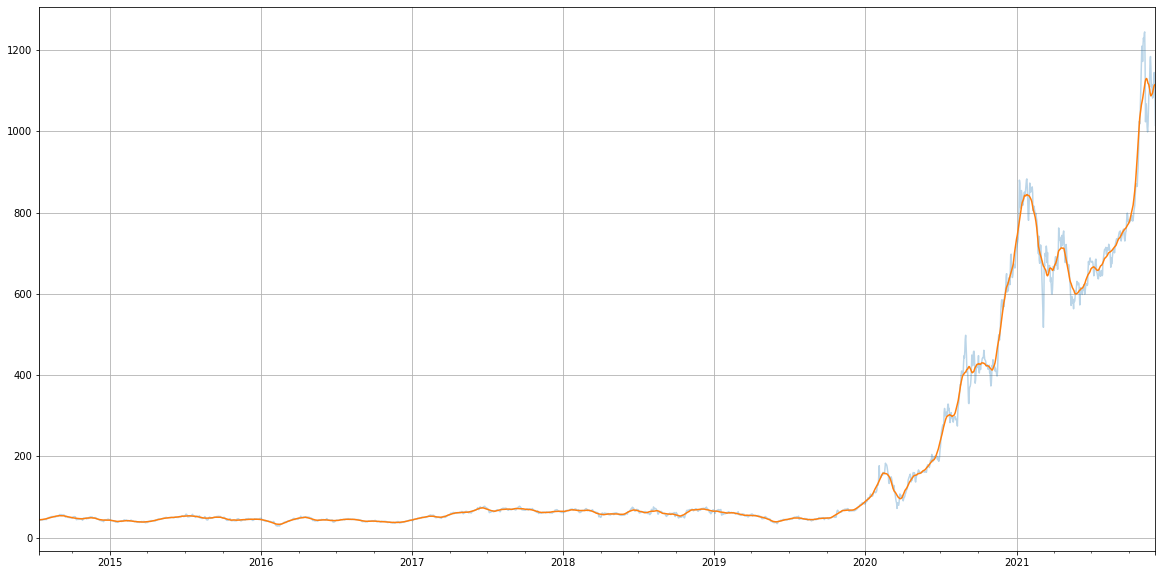

In [ ]:
win_100th = int((1/100)*df.shape[0])

df['Adjusted_Close'].interpolate(method='polynomial', order=3, limit_direction='both', inplace=True)
_ = df['Adjusted_Close'].plot(alpha=0.3)
_ = df['Adjusted_Close'].rolling(win_100th, center=True, min_periods=0).mean().plot()
_ = plt.grid(True)


In [ ]:
df

,rank_datetime,Open,High,Low,Close,Adjusted_Close,Volume
2014-07-14,0,43.998001,45.757999,43.090000,45.340000,45.340000,36016000.0
2014-07-15,1,45.346001,45.529999,43.619999,43.916000,43.916000,28592500.0
2014-07-16,2,44.363998,44.959999,43.363998,43.431999,43.431999,20222500.0
2014-07-17,3,43.231998,44.110001,42.720001,43.080002,43.080002,23247000.0
2014-07-18,4,43.189999,44.242001,43.186001,44.004002,44.004002,21268500.0
...,...,...,...,...,...,...,...
2021-11-29,2695,1100.989990,1142.670044,1100.189941,1136.989990,1136.989990,19464500.0
2021-11-30,2696,1144.369995,1168.000000,1118.000000,1144.760010,1144.760010,27092000.0
2021-12-01,2697,1160.699951,1172.839966,1090.760010,1095.000000,1095.000000,22816800.0
2021-12-02,2698,1099.060059,1113.000000,1056.650024,1084.599976,1084.599976,24258700.0


# Plots

## EDA Plot

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2700 entries, 2014-07-14 to 2021-12-03
Freq: D
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank_datetime   2700 non-null   int64  
 1   Open            1864 non-null   float64
 2   High            1864 non-null   float64
 3   Low             1864 non-null   float64
 4   Close           1864 non-null   float64
 5   Adjusted_Close  2700 non-null   float64
 6   Volume          1864 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 168.8 KB


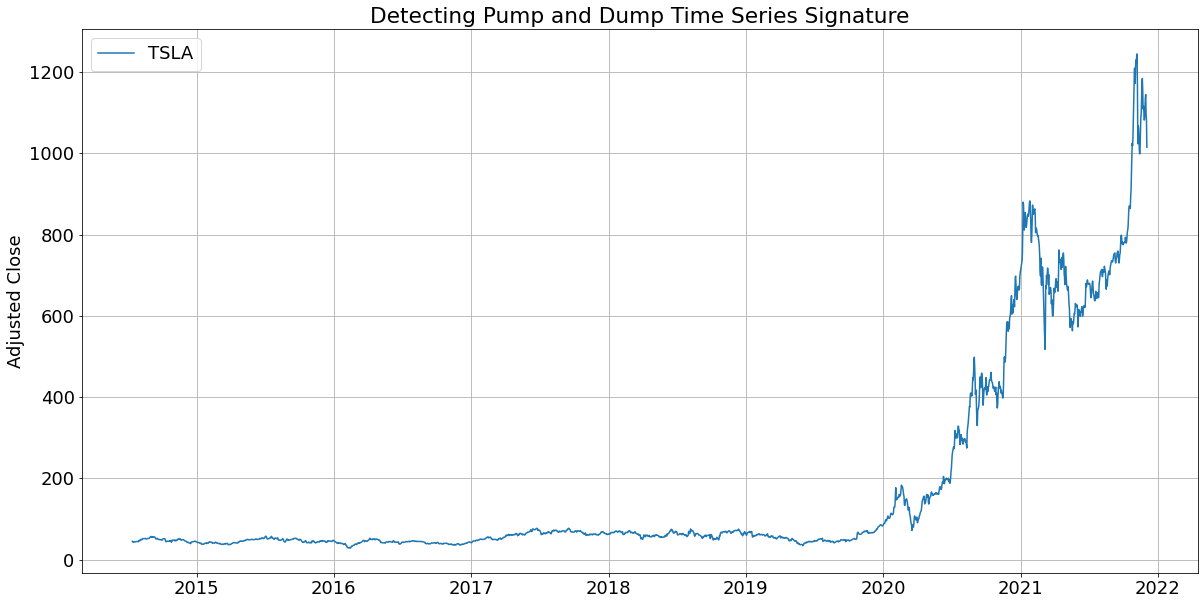

In [ ]:
plt.rcParams['font.size'] = 18
fig, ax = plt.subplots(figsize = (20,10))

_ = ax.plot(df.index, df.Adjusted_Close, label = f'{stock_name}')

_ = ax.legend()
_ = ax.grid(True)
ax.set_ylabel('Adjusted Close')
ax.set_title(f'Detecting Pump and Dump Time Series Signature')

_ = plt.show();

# LOWESS Smoothing

In [ ]:
# Compute LOWESS 

# ------- Select variables -------
# y values for both
# y=df['roberta15lg'].values
y=df['Adjusted_Close'].values

# x values for Linear Regression
# X=df['X3 distance to the nearest MRT station'].values.reshape(-1,1) # Note, we need X to be a 2D array, hence reshape
# x values for LOWESS
# x=df['sentence_no'].values 
x=np.arange(df.shape[0])

# ------- Linear Regression -------
# Define and fit the model
# model1 = LinearRegression()
# LR = model1.fit(X, y)

# Predict a few points with Linear Regression model for the grpah
# Create 20 evenly spaced points from smallest X to largest X
# x_range = np.linspace(X.min(), X.max(), 20) 
# Predict y values for our set of X values
# y_range = model1.predict(x_range.reshape(-1, 1))


# ------- LOWESS -------
# Generate y_hat values using lowess, try a couple values for hyperparameters
lowess40 = 1/40
lowess20 = 1/20
lowess10 = 1/10

y_hat40 = lowess(y, x, frac=lowess40)
y_hat20 = lowess(y, x, frac=lowess20)
y_hat10 = lowess(y, x, frac=lowess10)

# Save into 
# df['LOWESS_frac'] = y_hat[:,1].tolist()
df['lowess40'] = y_hat40[:,1].tolist()
df['lowess20'] = y_hat20[:,1].tolist()
df['lowess10'] = y_hat10[:,1].tolist()
df.head()

,rank_datetime,Open,High,Low,Close,Adjusted_Close,Volume,lowess40,lowess20,lowess10
2014-07-14,0,43.998001,45.757999,43.090000,45.340000,45.340000,36016000.0,42.708613,47.514568,51.585442
2014-07-15,1,45.346001,45.529999,43.619999,43.916000,43.916000,28592500.0,42.967244,47.588399,51.552248
2014-07-16,2,44.363998,44.959999,43.363998,43.431999,43.431999,20222500.0,43.225937,47.661244,51.518872
2014-07-17,3,43.231998,44.110001,42.720001,43.080002,43.080002,23247000.0,43.484640,47.733084,51.485313
2014-07-18,4,43.189999,44.242001,43.186001,44.004002,44.004002,21268500.0,43.743300,47.803900,51.451569


In [ ]:
# Verify numpy arrays same shape

print(f'x.shape: {x.shape}')
print(f'y.shape: {y.shape}')
print(f'y_hat40.shape: {y_hat40.shape}')
print(f'y_hat20.shape: {y_hat20.shape}')
print(f'y_hat10.shape: {y_hat10.shape}')




x.shape: (2700,)
y.shape: (2700,)
y_hat40.shape: (2700, 2)
y_hat20.shape: (2700, 2)
y_hat10.shape: (2700, 2)


In [ ]:
# Interpolate missing data

print(f'x nan count: {pd.Series(x).isna().sum()}')
print(f'y nan count: {pd.Series(y).isna().sum()}')
print(f'y_hat40 nan count: {pd.Series(y_hat40[:,0]).isna().sum()}')
print(f'y_hat20 nan count: {pd.Series(y_hat20[:,0]).isna().sum()}')
print(f'y_hat10 nan count: {pd.Series(y_hat10[:,0]).isna().sum()}')

x nan count: 0
y nan count: 0
y_hat40 nan count: 0
y_hat20 nan count: 0
y_hat10 nan count: 0


In [ ]:
# Create a scatter plot

# _ = fig = px.scatter(df, x='sentence_no', y=selected_model.value, custom_data=['text_raw'], opacity=0.3, color_discrete_sequence=['black']) # , size=1)
# _ = fig = px.scatter(df, x='Date', y=['Adjusted_Close'], custom_data=['Open','High','Low','Close'], opacity=0.9) # , color_discrete_sequence=['black']) # , size=1)
_ = fig = px.scatter(df, x=df.index, y=['Adjusted_Close'], custom_data=['Open','High','Low','Close'], opacity=0.9) # , color_discrete_sequence=['black']) # , size=1)
# _ = fig = px.line(df, x=df.index, y=df.Adjusted_Close, custom_data=['Open','High','Low','Close'], opacity=0.9) # , color_discrete_sequence=['black']) # , size=1)

# Add the prediction line
# fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Linear Regression', line=dict(color='limegreen')))
# _ = fig.add_traces(go.Scatter(x=df.index, y=df['lowess40'], name=f'LOWESS, frac={lowess40}', custom_data=['Open','High','Low','Close'], line=dict(color='red')))
_ = fig.add_traces(go.Scatter(x=df.index, y=df['lowess40'], name=f'LOWESS, frac={lowess40}', line=dict(color='red')))
# _ = fig.add_traces(go.Scatter(x=df.index, y=df['lowess20'], name=f'LOWESS, frac={lowess20}', line=dict(color='orange')))
# _ = fig.add_traces(go.Scatter(x=df.index, y=df['lowess10'], name=f'LOWESS, frac={lowess10}', line=dict(color='yellow')))
# _ = fig.add_traces(go.Scatter(x=df['Date'], y=y_hat2[:,1], name='LOWESS, frac=1/30', line=dict(color='orange')))

# _ = fig.add_traces(go.Scatter(x=df['sentence_no'], y=df['lowess20'], name='LOWESS, frac=1/20', line=dict(color='red')))
# _ = fig.add_traces(go.Scatter(x=df['sentence_no'], y=df['lowess30'], name='LOWESS, frac=1/30', line=dict(color='orange')))

# _ = fig.add_traces(px.scatter(df, x='sentence_no', y='lowess20', custom_data=['text_raw'])) #, name='LOWESS, frac=1/20', line=dict(color='red')))
# _ = fig.add_traces(px.scatter(df, x='sentence_no', y='lowess30', custom_data=['text_raw'])) #, name='LOWESS, frac=1/30', line=dict(color='orange')))


# _ = fig.add_traces(go.Scatter(x=df['sentence_no'], y=df['sma'], name=f'SMA, {selected_sma_window.value}%', line=dict(color='green'), opacity=0.1)) # , opacity=0.4, color_discrete_sequence=['green']))

# Change chart background color
# _ = fig.update_layout(dict(plot_bgcolor = 'white'))


# Change chart background color
_ = fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
_ = fig.update_xaxes(showgrid=True, 
                     gridwidth=1, 
                     gridcolor='lightgrey',
                     zeroline=True, 
                     zerolinewidth=1, 
                     zerolinecolor='lightgrey',
                     showline=True,
                     linewidth=1, 
                     linecolor='black',
                     showspikes = True,
                     spikemode  = 'across',
                     spikesnap = 'cursor')

_ = fig.update_yaxes(showgrid=True,
                     gridwidth=1,
                     gridcolor='lightgrey',
                     zeroline=True,
                     zerolinewidth=1,
                     zerolinecolor='lightgrey',
                     showline=True,
                     linewidth=1,
                     linecolor='black')

# Set figure title
# title_str = global_vars.corpus_titles_dt[selected_text.value][0]
LOWESS_FRAC=40
title_full_str = f'{stock_name} Pump and Dump Signature (LOWESS frac={LOWESS_FRAC})'
# LOWESS_FRAC='20, 40'
# title_full_str = f'{stock_name} Pump and Dump Signature (LOWESS frac={LOWESS_FRAC})'

# Update marker size
_ = fig.update_traces(marker=dict(size=1))

# title_str = f'Sentiment Arc: {title_str}<br>{selected_model.value} with {selected_sma_window.value}% SMA'

_ = fig.update_layout(
    plot_bgcolor='white',
    title=dict(text=title_full_str, y=0.95, x=0.5, xanchor='center', yanchor='bottom'), # font=dict(color='black')),
    xaxis_title="Date",
    yaxis_title='Adjusted Close',
    xaxis=dict(showgrid=True), 
    yaxis=dict(showgrid=True),
    showlegend = True,
    hovermode  = 'x',
    legend=dict(
    title = "Models:",
    orientation="h",
    xanchor="center",
    yanchor="bottom",
    y=-0.3, # 0.99,
    x=0.5 # x=0.01
))

_ = fig.update_traces(
    hovertemplate="<br>".join([
        "Date: %{x}",
        "Closing: %{y}",
        "Open: %{customdata[0]}",
        "High: %{customdata[1]}",
        "Low: %{customdata[2]}",
        "Close: %{customdata[3]}",
    ])
)

fig.show()

# Detect Peaks and Valleys

In [ ]:
# https://github.com/jankoslavic/py-tools/blob/master/findpeaks/findpeaks.py

def findpeaks(data, spacing=1, limit=None):
    """Finds peaks in `data` which are of `spacing` width and >=`limit`.
    :param data: values
    :param spacing: minimum spacing to the next peak (should be 1 or more)
    :param limit: peaks should have value greater or equal
    :return:
    """
    ln = data.size
    x = np.zeros(ln+2*spacing)
    x[:spacing] = data[0]-1.e-6
    x[-spacing:] = data[-1]-1.e-6
    x[spacing:spacing+ln] = data
    peak_candidate = np.zeros(ln)
    peak_candidate[:] = True
    for s in range(spacing):
        start = spacing - s - 1
        h_b = x[start : start + ln]  # before
        start = spacing
        h_c = x[start : start + ln]  # central
        start = spacing + s + 1
        h_a = x[start : start + ln]  # after
        peak_candidate = np.logical_and(peak_candidate, np.logical_and(h_c > h_b, h_c > h_a))

    ind = np.argwhere(peak_candidate)
    ind = ind.reshape(ind.size)
    if limit is not None:
        ind = ind[data[ind] > limit]
    return ind

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2700 entries, 2014-07-14 to 2021-12-03
Freq: D
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank_datetime   2700 non-null   int64  
 1   Open            1864 non-null   float64
 2   High            1864 non-null   float64
 3   Low             1864 non-null   float64
 4   Close           1864 non-null   float64
 5   Adjusted_Close  2700 non-null   float64
 6   Volume          1864 non-null   float64
 7   lowess40        2700 non-null   float64
 8   lowess20        2700 non-null   float64
 9   lowess10        2700 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 232.0 KB


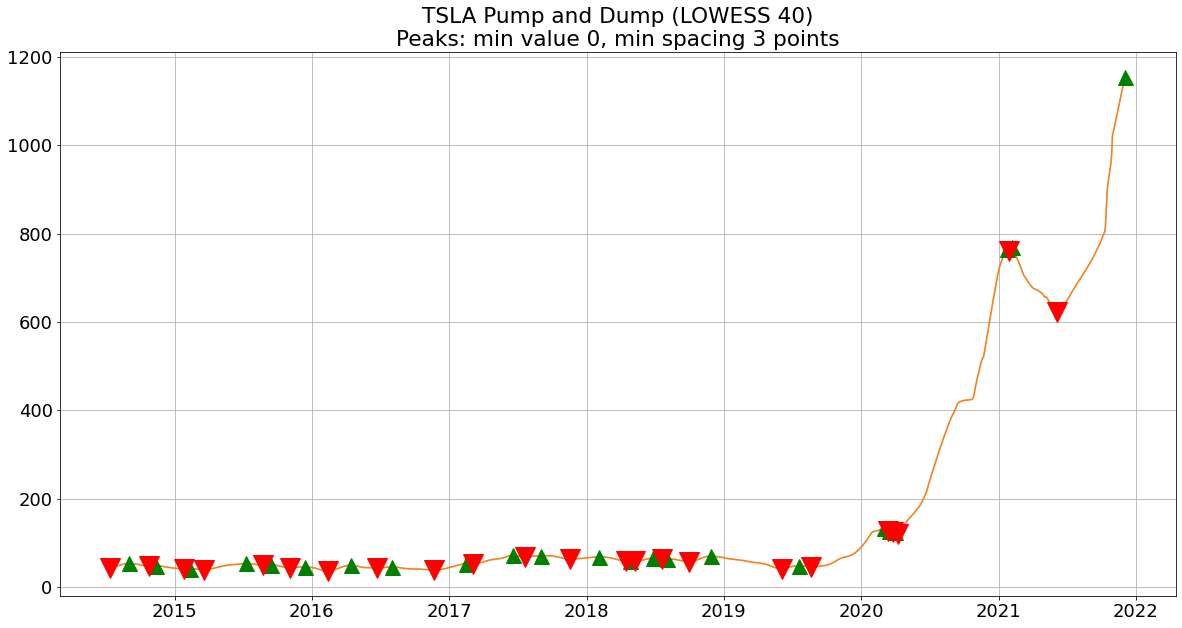

In [ ]:
# https://github.com/jankoslavic/py-tools/blob/master/findpeaks/Findpeaks%20example.ipynb

_ = plt.figure(figsize=(20,10))

# List of (x,y) coordinates of peaks and valleys
peaks_xy_ls = []
valleys_xy_ls = []

n = 80
m = 20
limit = 0
spacing = 3
# t = np.linspace(0., 1, n)
# x = np.zeros(n)
# np.random.seed(0)
# phase = 2 * np.pi * np.random.random(m)
# for i in range(m):
#     x += np.sin(phase[i] + 2 * np.pi * t * i)

x = df['lowess40'].values
t = df.index.values

# Plot SMA
_ = plt.plot(t, x, alpha=0.3)

# Plot LOWESS
# _ = plt.plot(y_hat2[:,0], y_hat2[:,1])
_ = plt.plot(df.index, df['lowess40'])

# Find Peaks
# peaks = findpeaks(y_hat2[:,1]) # , spacing=spacing, limit=limit)
peaks = findpeaks(df['lowess40'].values) # , spacing=spacing, limit=limit)

# Find Valleys
# valleys = findpeaks(-y_hat2[:,1])
valleys = findpeaks(df['lowess40'].mul(-1.0).values)

# _ = plt.axhline(limit, color='r')
_ = plt.plot(t[peaks], x[peaks], 'g^', markersize=15)
peaks_xy_ls = list(zip(t[peaks],x[peaks]))
_ = plt.plot(t[valleys], x[valleys], 'rv', markersize=20)
valleys_xy_ls = list(zip(t[valleys],x[valleys]))

# Set figure title
# title_str = global_vars.corpus_titles_dt[selected_text.value][0]
LOWESS_FRAC=40
title_all_str = f'{stock_name} Pump and Dump (LOWESS {LOWESS_FRAC})'
peak_str = f'Peaks: min value {limit}, min spacing {spacing} points'

_ = plt.title(f'{title_all_str}\n{peak_str}')
_ = plt.grid(True)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2700 entries, 2014-07-14 to 2021-12-03
Freq: D
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank_datetime   2700 non-null   int64  
 1   Open            1864 non-null   float64
 2   High            1864 non-null   float64
 3   Low             1864 non-null   float64
 4   Close           1864 non-null   float64
 5   Adjusted_Close  2700 non-null   float64
 6   Volume          1864 non-null   float64
 7   lowess40        2700 non-null   float64
 8   lowess20        2700 non-null   float64
 9   lowess10        2700 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 232.0 KB


Found a peak at [  52  123  166  206  355  433  505  535  632  747  836  946 1077 1121
 1161 1251 1297 1322 1395 1434 1485 1613 1648 1667 1836 1896 1954 2046
 2284 2388 2465 2541 2586 2673] (index), 
i.e. at ['2014-09-04T00:00:00.000000000' '2014-11-14T00:00:00.000000000'
 '2014-12-27T00:00:00.000000000' '2015-02-05T00:00:00.000000000'
 '2015-07-04T00:00:00.000000000' '2015-09-20T00:00:00.000000000'
 '2015-12-01T00:00:00.000000000' '2015-12-31T00:00:00.000000000'
 '2016-04-06T00:00:00.000000000' '2016-07-30T00:00:00.000000000'
 '2016-10-27T00:00:00.000000000' '2017-02-14T00:00:00.000000000'
 '2017-06-25T00:00:00.000000000' '2017-08-08T00:00:00.000000000'
 '2017-09-17T00:00:00.000000000' '2017-12-16T00:00:00.000000000'
 '2018-01-31T00:00:00.000000000' '2018-02-25T00:00:00.000000000'
 '2018-05-09T00:00:00.000000000' '2018-06-17T00:00:00.000000000'
 '2018-08-07T00:00:00.000000000' '2018-12-13T00:00:00.000000000'
 '2019-01-17T00:00:00.000000000' '2019-02-05T00:00:00.000000000'
 '2019-07-24

<Figure size 1440x720 with 0 Axes>

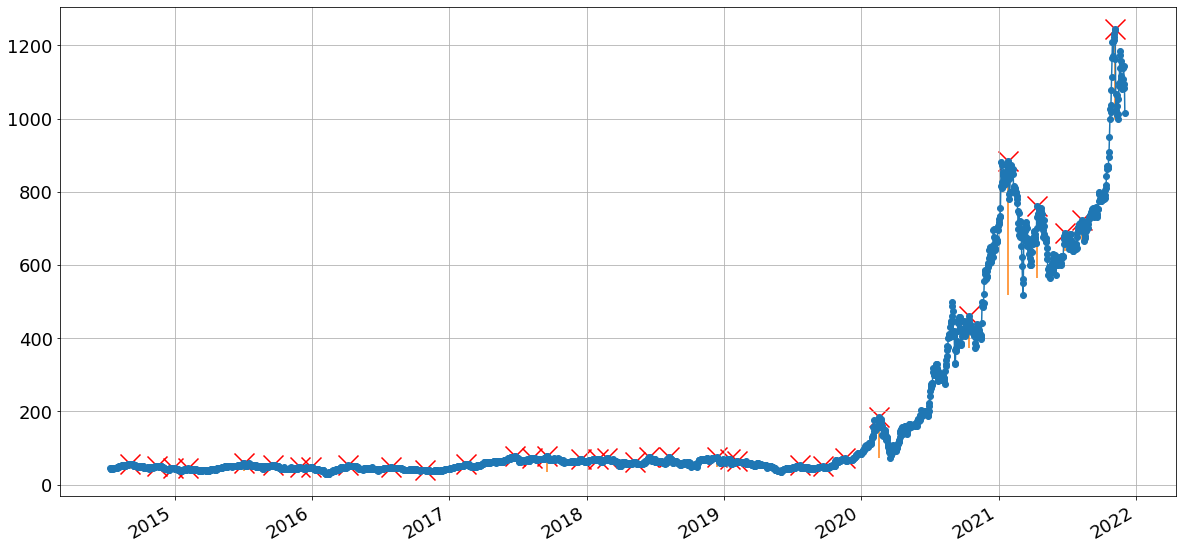

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Test

ts = pd.to_datetime(["2020-01-01", "2020-02-01", "2020-02-02", "2020-02-03", "2020-02-03 12:45:00", "2020-03-01", "2020-04-01"])
ys = [0, 1, 4, 3, 2.7, 2, 1]
# df = pd.DataFrame({'Timestamp':ts, 'Value':ys})
# print(df)

_ = plt.figure(figsize=(20,10))

idx, properties = find_peaks(df['Adjusted_Close'], prominence=0.1, width=10)
# introduce some shorthands:
l = properties["left_ips"]
r = properties["right_ips"]
p = properties["prominences"]
w = properties["widths"]
wh = properties["width_heights"]

peak_x = df.index[idx].values
peak_y = df['Adjusted_Close'][idx].values

print(f"Found a peak at {idx} (index), \ni.e. at {peak_x} (Timestamp) \nwith height {peak_y} (Adjusted_Close)")
print(f"Half of the peak maximum can be found at {wh} (Adjusted_Close) \nand has a width of {w} (Index)!")
print(f"The width starts at {l} (index) \nand goes to {r} (index) == ?? (INTERPOLATION OF INDEX REQUIRED!)")

fig,ax = plt.subplots()  # figsize=(10,3)) 
_ = plt.figure(figsize=(20,10))

_ = ax.plot(df.index,df['Adjusted_Close'], marker="o")

_ = ax.scatter(peak_x, peak_y, marker="x", s=20**2,color="r")

_ = ax.vlines(x=peak_x, ymin=peak_y - p, ymax = peak_y, color = "C1")
# ax.axhline(wh,color="g",linestyle="dashed")

_ = fig.autofmt_xdate()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
range_adj_close = df.Adjusted_Close.max() - df.Adjusted_Close.min()
print(f'Range of Adjusted Close: {range_adj_close}')

Range of Adjusted Close: 1215.9980038950948


In [ ]:
df.head()

,rank_datetime,Open,High,Low,Close,Adjusted_Close,Volume,lowess40,lowess20,lowess10
2014-07-14,0,43.998001,45.757999,43.090000,45.340000,45.340000,36016000.0,42.708613,47.514568,51.585442
2014-07-15,1,45.346001,45.529999,43.619999,43.916000,43.916000,28592500.0,42.967244,47.588399,51.552248
2014-07-16,2,44.363998,44.959999,43.363998,43.431999,43.431999,20222500.0,43.225937,47.661244,51.518872
2014-07-17,3,43.231998,44.110001,42.720001,43.080002,43.080002,23247000.0,43.484640,47.733084,51.485313
2014-07-18,4,43.189999,44.242001,43.186001,44.004002,44.004002,21268500.0,43.743300,47.803900,51.451569


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2700 entries, 2014-07-14 to 2021-12-03
Freq: D
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank_datetime   2700 non-null   int64  
 1   Open            1864 non-null   float64
 2   High            1864 non-null   float64
 3   Low             1864 non-null   float64
 4   Close           1864 non-null   float64
 5   Adjusted_Close  2700 non-null   float64
 6   Volume          1864 non-null   float64
 7   lowess40        2700 non-null   float64
 8   lowess20        2700 non-null   float64
 9   lowess10        2700 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 232.0 KB


In [ ]:
"""

# Test

ts = pd.to_datetime(["2020-01-01", "2020-02-01", "2020-02-02", "2020-02-03", "2020-02-03 12:45:00", "2020-03-01", "2020-04-01"])
ys = [0, 1, 4, 3, 2.7, 2, 1]
# df = pd.DataFrame({'Timestamp':ts, 'Value':ys})
print(df)

idx, properties = find_peaks(df['lowess40'], prominence=0.1, width=0.1)
# introduce some shorthands:
l = properties["left_ips"]
r = properties["right_ips"]
p = properties["prominences"]
w = properties["widths"]
wh = properties["width_heights"]

peak_x = df.index[idx].values
peak_y = df['Adjusted_Close'][idx].values

print(f"Found a peak at {idx} (index), i.e. at {peak_x} (Timestamp) with height {peak_y} (Value)")
print(f"Half of the peak maximum can be found at {wh} (Value) and has a width of {w} (Index)!")
print(f"The width starts at {l} (index) and goes to {r} (index) == ?? (INTERPOLATION OF INDEX REQUIRED!)")

fig,ax = plt.subplots(figsize=(10,3))    
ax.plot(df.index,df['Adjusted_Close'], marker="o")

ax.scatter(peak_x, peak_y, marker="x", s=20**2,color="r")

ax.vlines(x=peak_x, ymin=peak_y - p, ymax = peak_y, color = "C1")
ax.axhline(wh,color="g",linestyle="dashed")

fig.autofmt_xdate()
ax.grid()
plt.tight_layout()
plt.show()

""";

## Filter Noisy Peaks/Valleys

In [ ]:
# TODO: Filter out peak/valley and valley/peak pairs 
#         if local(max-min) < (threshold%) * global(max-min)

# OPTIONAL: These noisy peaks are downranked on downstream tasks
#           This functionality only justified for demanding downstream high-speed and/or big data processing

# Extract Hills

In [ ]:
# Merge and Sort

cruxes_xy_ls = peaks_xy_ls + valleys_xy_ls
cruxes_xy_ls.sort(key=lambda tup: tup[0])
cruxes_xy_ls

[(numpy.datetime64('2014-07-14T00:00:00.000000000'), 42.7086134666456),
 (numpy.datetime64('2014-09-01T00:00:00.000000000'), 53.25613451743013),
 (numpy.datetime64('2014-10-24T00:00:00.000000000'), 47.59027344245917),
 (numpy.datetime64('2014-11-12T00:00:00.000000000'), 48.268838669647316),
 (numpy.datetime64('2015-01-26T00:00:00.000000000'), 41.092159235584376),
 (numpy.datetime64('2015-02-11T00:00:00.000000000'), 41.41504381495726),
 (numpy.datetime64('2015-03-19T00:00:00.000000000'), 39.246121507647075),
 (numpy.datetime64('2015-07-11T00:00:00.000000000'), 53.31874744459449),
 (numpy.datetime64('2015-08-25T00:00:00.000000000'), 49.10991354100527),
 (numpy.datetime64('2015-09-14T00:00:00.000000000'), 49.91550269467709),
 (numpy.datetime64('2015-11-03T00:00:00.000000000'), 43.6962698749637),
 (numpy.datetime64('2015-12-14T00:00:00.000000000'), 45.5368673365016),
 (numpy.datetime64('2016-02-13T00:00:00.000000000'), 35.819371577553085),
 (numpy.datetime64('2016-04-13T00:00:00.000000000'

In [ ]:
len(cruxes_xy_ls)

46

In [ ]:
# extract tuples (low, high, low) for each hill
# slide 3 wide window over time series
#   if window pattern matches LOW-HIGH-LOW save

hills_ls = []

crux_prev_fl = -99

ptr_end = len(cruxes_xy_ls) - 3  # Window is 3 elements wide

for i, window_ptr in enumerate(range(0, ptr_end)):
  print(f'Processing Window Step #{i}:')
  val0 = cruxes_xy_ls[i][1]
  val1 = cruxes_xy_ls[i+1][1]
  val2 = cruxes_xy_ls[i+2][1]
  print(f'Window: [{val0:.2f}, {val1:.2f}, {val2:.2f}]')
  if (val0 < val1) & (val1 > val2):
    print(f'  Hill at Step = {i}')
    hills_ls.append([val0, val1, val2])


Processing Window Step #0:
Window: [42.71, 53.26, 47.59]
  Hill at Step = 0
Processing Window Step #1:
Window: [53.26, 47.59, 48.27]
Processing Window Step #2:
Window: [47.59, 48.27, 41.09]
  Hill at Step = 2
Processing Window Step #3:
Window: [48.27, 41.09, 41.42]
Processing Window Step #4:
Window: [41.09, 41.42, 39.25]
  Hill at Step = 4
Processing Window Step #5:
Window: [41.42, 39.25, 53.32]
Processing Window Step #6:
Window: [39.25, 53.32, 49.11]
  Hill at Step = 6
Processing Window Step #7:
Window: [53.32, 49.11, 49.92]
Processing Window Step #8:
Window: [49.11, 49.92, 43.70]
  Hill at Step = 8
Processing Window Step #9:
Window: [49.92, 43.70, 45.54]
Processing Window Step #10:
Window: [43.70, 45.54, 35.82]
  Hill at Step = 10
Processing Window Step #11:
Window: [45.54, 35.82, 48.97]
Processing Window Step #12:
Window: [35.82, 48.97, 43.03]
  Hill at Step = 12
Processing Window Step #13:
Window: [48.97, 43.03, 45.26]
Processing Window Step #14:
Window: [43.03, 45.26, 37.97]
  Hil

In [ ]:
hills_ls

[[42.7086134666456, 53.25613451743013, 47.59027344245917],
 [47.59027344245917, 48.268838669647316, 41.092159235584376],
 [41.092159235584376, 41.41504381495726, 39.246121507647075],
 [39.246121507647075, 53.31874744459449, 49.10991354100527],
 [49.10991354100527, 49.91550269467709, 43.6962698749637],
 [43.6962698749637, 45.5368673365016, 35.819371577553085],
 [35.819371577553085, 48.9688669035925, 43.029263227073635],
 [43.029263227073635, 45.26437063164057, 37.9742960405689],
 [37.9742960405689, 51.9793058822914, 51.73718931457958],
 [51.73718931457958, 71.20517640684582, 67.41406693150006],
 [67.41406693150006, 70.92269502431785, 62.493701148424],
 [62.493701148424, 67.80276575883519, 58.50315239712507],
 [58.50315239712507, 58.65063509341202, 58.19653127863733],
 [58.19653127863733, 65.45857540900565, 63.24304210374437],
 [63.24304210374437, 63.53001533468018, 56.88700775716921],
 [56.88700775716921, 69.82030364252766, 41.44260173752534],
 [41.44260173752534, 47.83050148469696, 45.

# Determine Half-Width & Half-Height of each Hill

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2700 entries, 2014-07-14 to 2021-12-03
Freq: D
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank_datetime   2700 non-null   int64  
 1   Open            1864 non-null   float64
 2   High            1864 non-null   float64
 3   Low             1864 non-null   float64
 4   Close           1864 non-null   float64
 5   Adjusted_Close  2700 non-null   float64
 6   Volume          1864 non-null   float64
 7   lowess40        2700 non-null   float64
 8   lowess20        2700 non-null   float64
 9   lowess10        2700 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 232.0 KB


## Find Half and Full Widths

In [ ]:
df.head(10)

,rank_datetime,Open,High,Low,Close,Adjusted_Close,Volume,lowess40,lowess20,lowess10
2014-07-14,0,43.998001,45.757999,43.090000,45.340000,45.340000,36016000.0,42.708613,47.514568,51.585442
2014-07-15,1,45.346001,45.529999,43.619999,43.916000,43.916000,28592500.0,42.967244,47.588399,51.552248
2014-07-16,2,44.363998,44.959999,43.363998,43.431999,43.431999,20222500.0,43.225937,47.661244,51.518872
2014-07-17,3,43.231998,44.110001,42.720001,43.080002,43.080002,23247000.0,43.484640,47.733084,51.485313
2014-07-18,4,43.189999,44.242001,43.186001,44.004002,44.004002,21268500.0,43.743300,47.803900,51.451569
2014-07-19,5,NaN,NaN,NaN,NaN,44.564895,NaN,44.001861,47.873679,51.417642
2014-07-20,6,NaN,NaN,NaN,NaN,44.490400,NaN,44.260263,47.942406,51.383530
2014-07-21,7,43.450001,44.641998,43.344002,44.108002,44.108002,19111000.0,44.518438,48.010070,51.349233
2014-07-22,8,44.438000,44.660000,43.821999,43.916000,43.916000,13650000.0,44.776316,48.076662,51.314752
2014-07-23,9,44.001999,44.950001,43.886002,44.498001,44.498001,15416500.0,45.033826,48.142175,51.280088


In [ ]:
peaks_lowess, _ = find_peaks(df.lowess40.values)
peaks_raw, _ = find_peaks(df.Adjusted_Close.values)

# x assigned with LOWESS smoothing above

# Get half/full peaks for LOWESS smoothed
print('HALF WIDTHS ----------')
results_half_tup = peak_widths(x, peaks_lowess, rel_height=0.5)
results_half_tup
half_widths_np = results_half_tup[0]  # widths
half_widths_np

print('\n')

# print('FULL WIDTHS ----------')
# results_full_tup = peak_widths(x, peaks_lowess, rel_height=1)
# full_widths_np = results_full_tup[0]
# full_widths_np

"""
# Get half/full peaks for Raw Time Series
print('HALF WIDTHS ----------')
results_half_tup = peak_widths(x, peaks_raw, rel_height=0.5)
half_widths_np = results_half_tup[0]  # widths
half_widths_np

print('\n')

# print('FULL WIDTHS ----------')
# results_full_tup = peak_widths(x, peaks_raw, rel_height=1)
# full_widths_np = results_full_tup[0]
# full_widths_np
""";

HALF WIDTHS ----------




In [ ]:
ahalf_width_np, y_height_np, x_start_np, x_end_np = results_half_tup

In [ ]:
ahalf_width_np

array([ 70.76202858,  15.42095028,  13.7078322 , 159.5375205 ,
        18.24457086,  34.95379991,  79.99955554,  34.47172213,
        16.55263437, 714.17211568,  61.84287762,  74.14354256,
         8.45127615,  83.97951471,  15.32306005,  82.9245462 ,
        33.96308329,  31.91757633,   2.02164736,   4.75871125,
         5.40745931,  78.33225864])

In [ ]:
# Create list of tuples for all half_widths

half_width_ls = list(zip(ahalf_width_np, y_height_np, x_start_np, x_end_np))
half_width_ls
print(f'\n\nTotal of {len(half_width_ls)} half_widths')

[(70.76202858159473,
  47.982373992037864,
  20.614458563368622,
  91.37648714496336),
 (15.420950284349786,
  47.929556056053244,
  112.47052860841853,
  127.89147889276832),
 (13.707832199516162,
  41.25360152527082,
  204.04953314255337,
  217.75736534206953),
 (159.5375205015177, 46.282434476120784, 294.532804929838, 454.0703254313557),
 (18.244570859112514, 49.51270811784118, 417.150793951021, 435.3953648101335),
 (34.95379991029654, 44.61656860573265, 496.5176104394159, 531.4714103497124),
 (79.999555540639, 43.4715814720807, 610.599301131232, 690.598856671871),
 (34.47172212929024, 44.1468169293571, 731.077656859753, 765.5493789890432),
 (16.552634374819377, 51.85824759843549, 941.3601012177471, 957.9127355925665),
 (714.1721156767408, 56.32388907218558, 991.0111651602144, 1705.1832808369552),
 (61.842877624447055,
  69.16838097790895,
  1121.4036672659588,
  1183.2465448904059),
 (74.14354255763828, 65.1482334536296, 1260.8185427412918, 1334.96208529893),
 (8.451276154888319,
 



Total of 22 half_widths


In [ ]:
half_widths_np.shape

# print('\n')

# full_widths_np.shape

(22,)

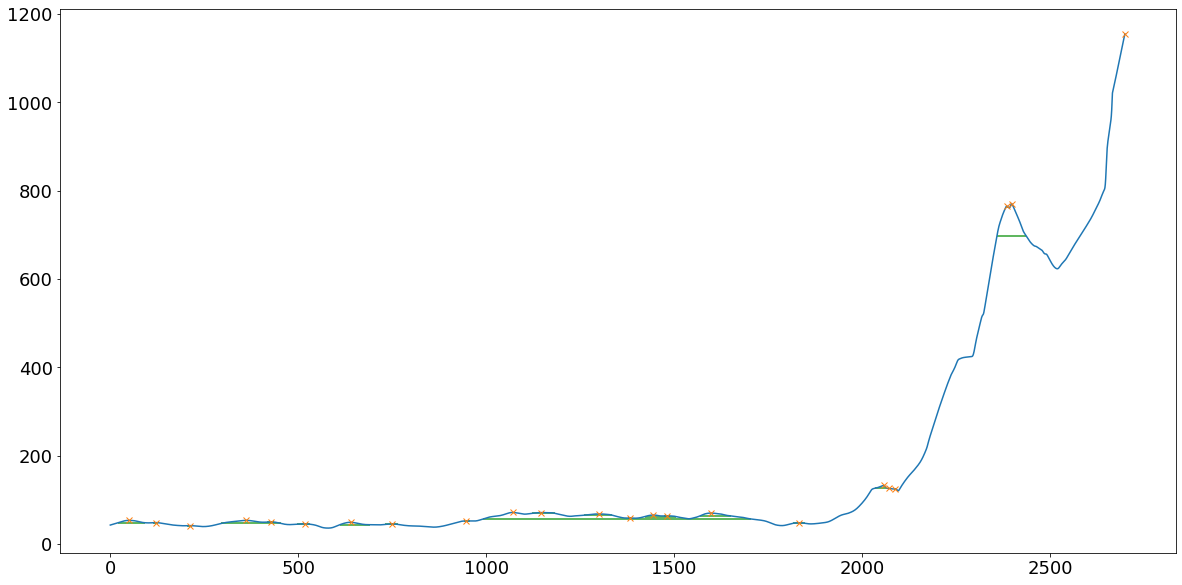

In [ ]:
plt.plot(x)

plt.plot(peaks, x[peaks], "x")

plt.hlines(*results_half_tup[1:], color="C2")

# plt.hlines(*results_full_tup[1:], color="C3")

plt.show()

## Find Peak Prominences

In [ ]:
# https://stackoverflow.com/questions/53778703/python-scipy-signal-peak-widths-absolute-heigth-fft-3db-damping

# Find peaks
# peaks, _ = find_peaks(x)
# prominences, left_bases, right_bases = peak_prominences(x, peaks)

# Calculate widths at x[peaks] - offset * rel_height
# widths, h_eval, left_ips, right_ips = peak_widths(
#     x, peaks, 
#     rel_height=1,
#     prominence_data=(offset, left_bases, right_bases)
# )

prominences, left_bases, right_bases = peak_prominences(x, peaks)
type(left_bases)
left_bases.shape
left_bases

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: PeakPropertyWarning:

some peaks have a prominence of 0



numpy.ndarray

(23,)

array([   0,  102,  196,  248,  407,  477,  579,  710,  579,  579, 1103,
       1223, 1373, 1396, 1467, 1539, 1786,  579, 2068, 2081,  579,  579,
        579])

In [ ]:
peaks, _ = find_peaks(x)

# prominences, left_bases, right_bases = peak_prominences(x, peaks)

prominences_np = peak_prominences(x, peaks)[0]

prominences_np

array([1.05475211e+01, 6.78565227e-01, 3.22884579e-01, 1.40726259e+01,
       8.05589154e-01, 1.84059746e+00, 1.09945709e+01, 2.23510740e+00,
       2.42116568e-01, 2.97625747e+01, 3.50862809e+00, 5.30906461e+00,
       1.47482696e-01, 7.26204413e+00, 2.86973231e-01, 1.29332959e+01,
       2.52425236e+00, 1.22639394e+01, 4.99253450e-02, 3.12084635e-01,
       3.96695649e+00, 1.47548579e+02])

In [ ]:
peaks, _ = find_peaks(x)

prominences, left_bases, right_bases = peak_prominences(x, peaks)

prominences_np = peak_prominences(x, peaks)[0]

prominences_np

array([1.05475211e+01, 6.78565227e-01, 3.22884579e-01, 1.40726259e+01,
       8.05589154e-01, 1.84059746e+00, 1.09945709e+01, 2.23510740e+00,
       2.42116568e-01, 2.97625747e+01, 3.50862809e+00, 5.30906461e+00,
       1.47482696e-01, 7.26204413e+00, 2.86973231e-01, 1.29332959e+01,
       2.52425236e+00, 1.22639394e+01, 4.99253450e-02, 3.12084635e-01,
       3.96695649e+00, 1.47548579e+02])

In [ ]:
prominences.shape

(22,)

In [ ]:
for i in range(left_bases.shape[0]):
  print(f'Prominence #{i}:\n  Left: {left_bases[i]}\n Right: {right_bases[i]}\nHeigth: {right_bases[i]-left_bases[i]}\n') 


Prominence #0:
  Left: 0
 Right: 248
Heigth: 248

Prominence #1:
  Left: 102
 Right: 248
Heigth: 146

Prominence #2:
  Left: 196
 Right: 248
Heigth: 52

Prominence #3:
  Left: 248
 Right: 579
Heigth: 331

Prominence #4:
  Left: 407
 Right: 579
Heigth: 172

Prominence #5:
  Left: 477
 Right: 579
Heigth: 102

Prominence #6:
  Left: 579
 Right: 861
Heigth: 282

Prominence #7:
  Left: 710
 Right: 861
Heigth: 151

Prominence #8:
  Left: 579
 Right: 966
Heigth: 387

Prominence #9:
  Left: 579
 Right: 1786
Heigth: 1207

Prominence #10:
  Left: 1103
 Right: 1786
Heigth: 683

Prominence #11:
  Left: 1223
 Right: 1539
Heigth: 316

Prominence #12:
  Left: 1373
 Right: 1396
Heigth: 23

Prominence #13:
  Left: 1396
 Right: 1539
Heigth: 143

Prominence #14:
  Left: 1467
 Right: 1539
Heigth: 72

Prominence #15:
  Left: 1539
 Right: 1786
Heigth: 247

Prominence #16:
  Left: 1786
 Right: 1864
Heigth: 78

Prominence #17:
  Left: 579
 Right: 2096
Heigth: 1517

Prominence #18:
  Left: 2068
 Right: 2096
He

In [ ]:
prominences_np.shape

(22,)

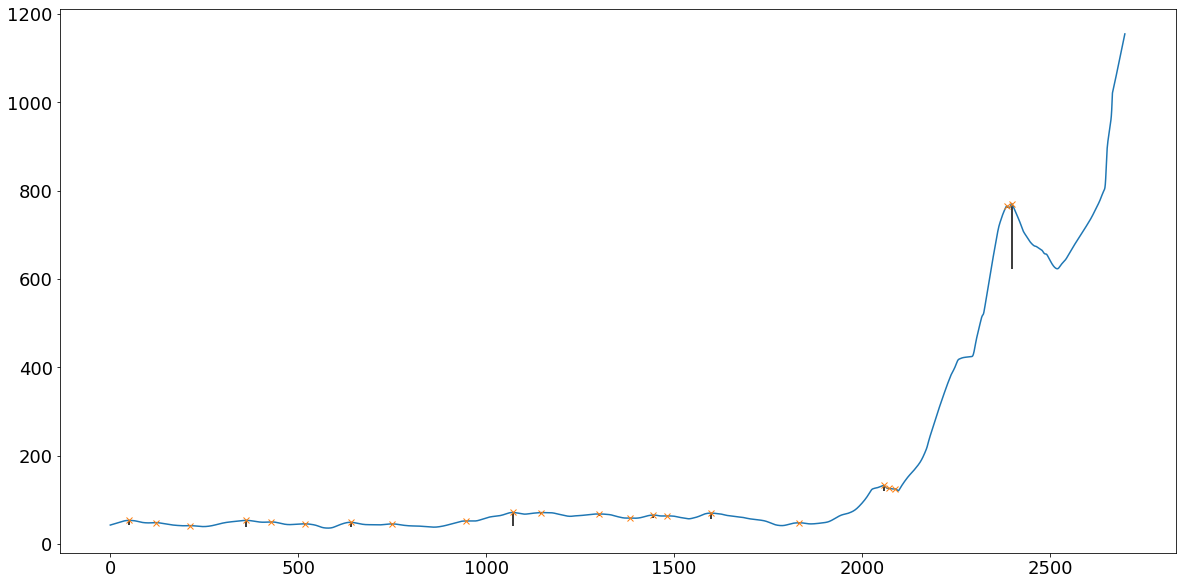

In [ ]:
contour_heights = x[peaks] - prominences_np

_ = plt.plot(x)

_ = plt.plot(peaks, x[peaks], "x")

_ = plt.vlines(x=peaks, ymin=contour_heights, ymax=x[peaks])

plt.show()

In [ ]:
vlines_ls = list(zip(peaks, contour_heights, x[peaks], x[peaks]-contour_heights))

In [ ]:
print(vlines_ls[0])

(49, 42.7086134666456, 53.25613451743013, 10.547521050784525)


In [ ]:
# Filter out Prominences without corresponding full/half-width ranges

print(f'Prominences Count: {prominences_np.shape[0]}')
print(f'Half-Width Count: {half_widths_np.shape[0]}')
# print(f'Full-Width Count: {full_widths_np.shape[0]}')

Prominences Count: 22
Half-Width Count: 22


In [ ]:
prominences_np[0]

10.547521050784525

In [ ]:
# 3 matricies: height(y), left(x_left), right(x_right)

results_half_tup[1:]

(array([ 47.98237399,  47.92955606,  41.25360153,  46.28243448,
         49.51270812,  44.61656861,  43.47158147,  44.14681693,
         51.8582476 ,  56.32388907,  69.16838098,  65.14823345,
         58.57689375,  61.82755334,  63.38652872,  63.3536557 ,
         46.5683753 , 126.17980818, 125.69530593, 124.56845511,
        762.70944501, 696.66811303]),
 array([  20.61445856,  112.47052861,  204.04953314,  294.53280493,
         417.15079395,  496.51761044,  610.59930113,  731.07765686,
         941.36010122,  991.01116516, 1121.40366727, 1260.81854274,
        1377.10120814, 1421.37937845, 1472.64318813, 1568.39154238,
        1815.21063081, 2034.27792573, 2069.415071  , 2084.79592243,
        2382.66445439, 2358.61690013]),
 array([  91.37648714,  127.89147889,  217.75736534,  454.07032543,
         435.39536481,  531.47141035,  690.59885667,  765.54937899,
         957.91273559, 1705.18328084, 1183.24654489, 1334.9620853 ,
        1385.55248429, 1505.35889316, 1487.96624819, 1651.

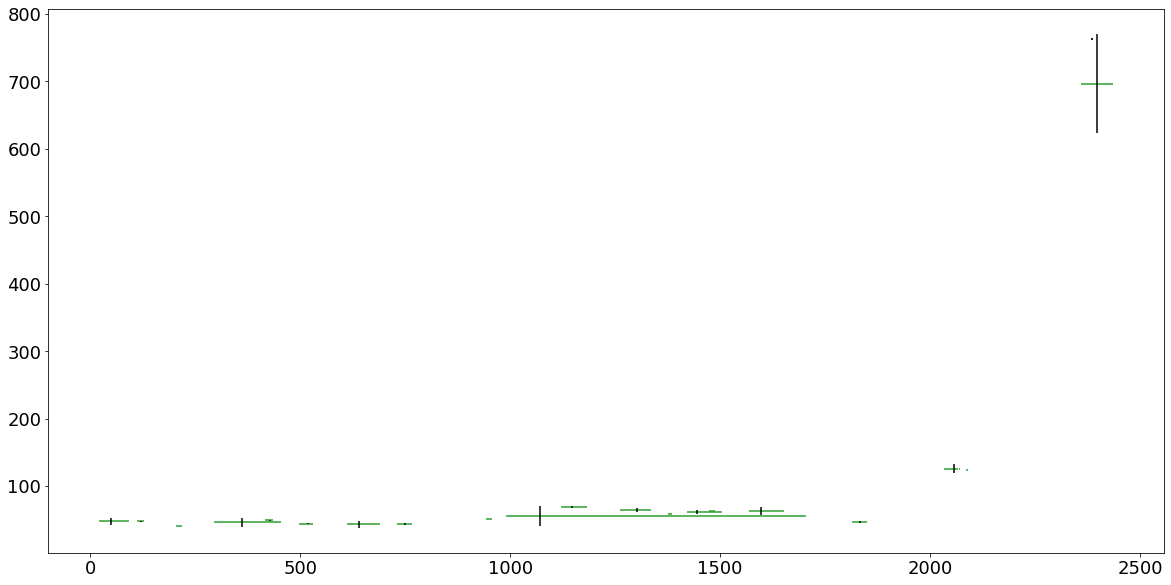

In [ ]:
_ = plt.hlines(*results_half_tup[1:], color="C2")
_ = plt.vlines(x=peaks, ymin=contour_heights, ymax=x[peaks])


In [ ]:
results_half_tup

(array([ 70.76202858,  15.42095028,  13.7078322 , 159.5375205 ,
         18.24457086,  34.95379991,  79.99955554,  34.47172213,
         16.55263437, 714.17211568,  61.84287762,  74.14354256,
          8.45127615,  83.97951471,  15.32306005,  82.9245462 ,
         33.96308329,  31.91757633,   2.02164736,   4.75871125,
          5.40745931,  78.33225864]),
 array([ 47.98237399,  47.92955606,  41.25360153,  46.28243448,
         49.51270812,  44.61656861,  43.47158147,  44.14681693,
         51.8582476 ,  56.32388907,  69.16838098,  65.14823345,
         58.57689375,  61.82755334,  63.38652872,  63.3536557 ,
         46.5683753 , 126.17980818, 125.69530593, 124.56845511,
        762.70944501, 696.66811303]),
 array([  20.61445856,  112.47052861,  204.04953314,  294.53280493,
         417.15079395,  496.51761044,  610.59930113,  731.07765686,
         941.36010122,  991.01116516, 1121.40366727, 1260.81854274,
        1377.10120814, 1421.37937845, 1472.64318813, 1568.39154238,
        1815

In [ ]:
half_width_ls

[(70.76202858159473,
  47.982373992037864,
  20.614458563368622,
  91.37648714496336),
 (15.420950284349786,
  47.929556056053244,
  112.47052860841853,
  127.89147889276832),
 (13.707832199516162,
  41.25360152527082,
  204.04953314255337,
  217.75736534206953),
 (159.5375205015177, 46.282434476120784, 294.532804929838, 454.0703254313557),
 (18.244570859112514, 49.51270811784118, 417.150793951021, 435.3953648101335),
 (34.95379991029654, 44.61656860573265, 496.5176104394159, 531.4714103497124),
 (79.999555540639, 43.4715814720807, 610.599301131232, 690.598856671871),
 (34.47172212929024, 44.1468169293571, 731.077656859753, 765.5493789890432),
 (16.552634374819377, 51.85824759843549, 941.3601012177471, 957.9127355925665),
 (714.1721156767408, 56.32388907218558, 991.0111651602144, 1705.1832808369552),
 (61.842877624447055,
  69.16838097790895,
  1121.4036672659588,
  1183.2465448904059),
 (74.14354255763828, 65.1482334536296, 1260.8185427412918, 1334.96208529893),
 (8.451276154888319,
 

In [ ]:
# Create list of vline tuples (x, _, _, prominence)

vlines_ls = list(zip(peaks, contour_heights, x[peaks], x[peaks]-contour_heights))
print(vlines_ls[0])

(49, 42.7086134666456, 53.25613451743013, 10.547521050784525)


## Select Most Import Prominence/Half-Width Pairs

In [ ]:
"""
ts = pd.to_datetime(["2020-01-01", "2020-02-01", "2020-02-02", "2020-02-03", "2020-02-03 12:45:00", "2020-03-01", "2020-04-01"])
ys = [0, 1, 4, 3, 2.7, 2, 1]
# df = pd.DataFrame({'Timestamp':ts, 'Value':ys})
# print(df)

idx, properties = find_peaks(df['Adjusted_Close'], prominence=0.1, width=0.5)
# introduce some shorthands:
l = properties["left_ips"]
r = properties["right_ips"]
p = properties["prominences"]
w = properties["widths"]
wh = properties["width_heights"]

peak_x = df.index[idx].values
peak_y = df['Adjusted_Close'][idx].values

print(f"Found a peak at {idx} (index), i.e. at {peak_x} (Timestamp) with height {peak_y} (Value)")
print(f"Half of the peak maximum can be found at {wh} (Value) and has a width of {w} (Index)!")
print(f"The width starts at {l} (index) and goes to {r} (index) == ?? (INTERPOLATION OF INDEX REQUIRED!)")

fig,ax = plt.subplots(figsize=(10,3))    
ax.plot(df.index,df['Adjusted_Close'], marker="o")

ax.scatter(peak_x, peak_y, marker="x", s=20**2,color="r")

ax.vlines(x=peak_x, ymin=peak_y - p, ymax = peak_y, color = "C1")
ax.axhline(wh,color="g",linestyle="dashed")

fig.autofmt_xdate()
ax.grid()
plt.tight_layout()
plt.show()
""";

In [ ]:
# Percent of Min-Max Range for Prominences to Keep

prom_per = widgets.IntSlider(
    value=10,
    min=5,
    max=50,
    step=1,
    description='Percent:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

print('Prominences to Keep as Percent of Min-Max Range:')
prom_per

Prominences to Keep as Percent of Min-Max Range:


IntSlider(value=10, continuous_update=False, description='Percent:', max=50, min=5)

In [ ]:
# Compute Adjusted_Close Stats

adj_close_max = df.Adjusted_Close.max()
adj_close_min = df.Adjusted_Close.min()
adj_close_range = adj_close_max - adj_close_min

print(f'Adjusted Close Stats:')
print(f'    Max: {adj_close_max}')
print(f'    Min: {adj_close_min}')
print(f'  Range: {adj_close_range}')

prom_minlen = int((prom_per.value/100)*adj_close_range)
print(f'   Size: {prom_minlen}')

Adjusted Close Stats:
    Max: 1244.7320028950949
    Min: 28.733999
  Range: 1215.9980038950948
   Size: 121


In [ ]:
# Sort by prominence, descending

vlines_ls.sort(key=lambda tup: tup[3], reverse=True)
vlines_ls
print('\n')

# Show which Prominences to Keep based upon Percent of Min-Max Range
prom_keep_ls = []
for i, avline in enumerate(vlines_ls):
  avline_len = int(avline[3])
  if avline_len >= prom_minlen:
    print(f'\nKeep Prominence #{i}: {avline}')
    prom_keep_ls.append(avline)

[(2398, 622.8938234236705, 770.4424026275933, 147.54857920392283),
 (1070, 41.44260173752534, 71.20517640684582, 29.762574669320486),
 (362, 39.246121507647075, 53.31874744459449, 14.072625936947418),
 (1598, 56.88700775716921, 69.82030364252766, 12.933295885358454),
 (2057, 120.04783849881524, 132.31177786627686, 12.263939367461617),
 (639, 37.9742960405689, 48.9688669035925, 10.994570863023597),
 (49, 42.7086134666456, 53.25613451743013, 10.547521050784525),
 (1445, 58.19653127863733, 65.45857540900565, 7.2620441303683165),
 (1301, 62.493701148424, 67.80276575883519, 5.309064610411191),
 (2385, 760.725966766539, 764.6929232614099, 3.9669564948708285),
 (1147, 67.41406693150006, 70.92269502431785, 3.508628092817787),
 (1833, 45.30624912460208, 47.83050148469696, 2.524252360094877),
 (750, 43.029263227073635, 45.26437063164057, 2.235107404566932),
 (518, 43.6962698749637, 45.5368673365016, 1.8405974615379037),
 (427, 49.10991354100527, 49.91550269467709, 0.8055891536718178),
 (121, 47.




Keep Prominence #0: (2398, 622.8938234236705, 770.4424026275933, 147.54857920392283)


In [ ]:
prom_keep_ls

[(2398, 622.8938234236705, 770.4424026275933, 147.54857920392283)]

In [ ]:
results_half_tup

(array([ 70.76202858,  15.42095028,  13.7078322 , 159.5375205 ,
         18.24457086,  34.95379991,  79.99955554,  34.47172213,
         16.55263437, 714.17211568,  61.84287762,  74.14354256,
          8.45127615,  83.97951471,  15.32306005,  82.9245462 ,
         33.96308329,  31.91757633,   2.02164736,   4.75871125,
          5.40745931,  78.33225864]),
 array([ 47.98237399,  47.92955606,  41.25360153,  46.28243448,
         49.51270812,  44.61656861,  43.47158147,  44.14681693,
         51.8582476 ,  56.32388907,  69.16838098,  65.14823345,
         58.57689375,  61.82755334,  63.38652872,  63.3536557 ,
         46.5683753 , 126.17980818, 125.69530593, 124.56845511,
        762.70944501, 696.66811303]),
 array([  20.61445856,  112.47052861,  204.04953314,  294.53280493,
         417.15079395,  496.51761044,  610.59930113,  731.07765686,
         941.36010122,  991.01116516, 1121.40366727, 1260.81854274,
        1377.10120814, 1421.37937845, 1472.64318813, 1568.39154238,
        1815

In [ ]:
half_width_ls

[(70.76202858159473,
  47.982373992037864,
  20.614458563368622,
  91.37648714496336),
 (15.420950284349786,
  47.929556056053244,
  112.47052860841853,
  127.89147889276832),
 (13.707832199516162,
  41.25360152527082,
  204.04953314255337,
  217.75736534206953),
 (159.5375205015177, 46.282434476120784, 294.532804929838, 454.0703254313557),
 (18.244570859112514, 49.51270811784118, 417.150793951021, 435.3953648101335),
 (34.95379991029654, 44.61656860573265, 496.5176104394159, 531.4714103497124),
 (79.999555540639, 43.4715814720807, 610.599301131232, 690.598856671871),
 (34.47172212929024, 44.1468169293571, 731.077656859753, 765.5493789890432),
 (16.552634374819377, 51.85824759843549, 941.3601012177471, 957.9127355925665),
 (714.1721156767408, 56.32388907218558, 991.0111651602144, 1705.1832808369552),
 (61.842877624447055,
  69.16838097790895,
  1121.4036672659588,
  1183.2465448904059),
 (74.14354255763828, 65.1482334536296, 1260.8185427412918, 1334.96208529893),
 (8.451276154888319,
 

In [ ]:
# Create list of half_width hline tuples corresponding to kept vlines
#   prom_width_ls = (x, prom_len, half_width)

prom_width_ls = []

# results_half_tup: 4 matrices 0:widths, 1:y, 2:x-start, 3:x-end

for i, prom_tup in enumerate(prom_keep_ls):
  prom_x, prom_y_bottom, prom_y_top, prom_len = prom_tup
  print(f'Prominence x={prom_x}: {prom_len}')
  for ahalf_width_tup in half_width_ls:
    width_y_val = ahalf_width_tup[1]
    width_x_start = ahalf_width_tup[2]
    width_x_end = ahalf_width_tup[3]
    if (prom_x > width_x_start) & (prom_x < width_x_end):
      print(f'  In Half_Width x-range: {ahalf_width_tup[2]} - {ahalf_width_tup[3]}')
      width_width = ahalf_width_tup[0]
      width_y = ahalf_width_tup[1]
      prom_width_ls.append((prom_x, prom_y_bottom, prom_y_top, prom_len, width_y_val, width_x_start, width_x_end, width_width))

Prominence x=2398: 147.54857920392283
  In Half_Width x-range: 2358.6169001257686 - 2436.94915876147


In [ ]:
# prom_width_ls (prom_x, prom_y_bottom, prom_y_top, prom_len, width_y_val, width_x_start, width_x_end, width_width)

prom_width_ls

[(2398,
  622.8938234236705,
  770.4424026275933,
  147.54857920392283,
  696.6681130256319,
  2358.6169001257686,
  2436.94915876147,
  78.33225863570124)]

## Compute the Ratio Prominence to Half-Width 

In [ ]:
prom_width_df = pd.DataFrame(prom_width_ls, columns=['x',
                                                     'prom_y_bottom', 'prom_y_top', 'prominence',
                                                     'width_y_val',
                                                     'width_x_start', 'width_x_end', 'half_width'])

prom_width_df['ratio_prom2halfwidth'] = prom_width_df['prominence']/prom_width_df['half_width']
prom_width_df.sort_values('ratio_prom2halfwidth', ascending=False, inplace=True)
prom_width_df['rank_prom2halfwidth'] = prom_width_df['ratio_prom2halfwidth'].rank(ascending=False).astype('int')
prom_width_df.head() 
prom_width_df.info()

,x,prom_y_bottom,prom_y_top,prominence,width_y_val,width_x_start,width_x_end,half_width,ratio_prom2halfwidth,rank_prom2halfwidth
0,2398,622.893823,770.442403,147.548579,696.668113,2358.6169,2436.949159,78.332259,1.883625,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   x                     1 non-null      int64  
 1   prom_y_bottom         1 non-null      float64
 2   prom_y_top            1 non-null      float64
 3   prominence            1 non-null      float64
 4   width_y_val           1 non-null      float64
 5   width_x_start         1 non-null      float64
 6   width_x_end           1 non-null      float64
 7   half_width            1 non-null      float64
 8   ratio_prom2halfwidth  1 non-null      float64
 9   rank_prom2halfwidth   1 non-null      int64  
dtypes: float64(8), int64(2)
memory usage: 88.0 bytes


In [ ]:
# from datetime import datetime as dt

In [ ]:
# Insert DateTime Column (df.index) corresponding to ordinal x Column (prom_width_df.x)

match_datetime_ls = []

for index, row in prom_width_df.iterrows():
  adatetime_dt = pd.to_datetime(row[0])
  print(f'prom_width_df Index: {index} and Row: {adatetime_dt}')
  match_datetime_row = df[df.rank_datetime == row[0]]
  match_datetime = match_datetime_row.index
  print(f'  matching datetime: {match_datetime}')
  match_datetime_ls.append(match_datetime)

prom_width_df.insert(0, 'datetime', match_datetime_ls)

# Extract from numpy array and change from DatetimeIndex to datetime type
prom_width_df['datetime'] = prom_width_df['datetime'].apply(lambda x: x.to_pydatetime())
prom_width_df['datetime'] = prom_width_df['datetime'].apply(lambda x: x[0])

prom_width_df Index: 0 and Row: 1970-01-01 00:00:00.000002398
  matching datetime: DatetimeIndex(['2021-02-05'], dtype='datetime64[ns]', freq='D')


In [ ]:
print(prom_width_df.iloc[0]['datetime'])

2021-02-05 00:00:00


In [ ]:
prom_width_df.head()
prom_width_df.info()

,datetime,x,prom_y_bottom,prom_y_top,prominence,width_y_val,width_x_start,width_x_end,half_width,ratio_prom2halfwidth,rank_prom2halfwidth
0,2021-02-05,2398,622.893823,770.442403,147.548579,696.668113,2358.6169,2436.949159,78.332259,1.883625,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              1 non-null      datetime64[ns]
 1   x                     1 non-null      int64         
 2   prom_y_bottom         1 non-null      float64       
 3   prom_y_top            1 non-null      float64       
 4   prominence            1 non-null      float64       
 5   width_y_val           1 non-null      float64       
 6   width_x_start         1 non-null      float64       
 7   width_x_end           1 non-null      float64       
 8   half_width            1 non-null      float64       
 9   ratio_prom2halfwidth  1 non-null      float64       
 10  rank_prom2halfwidth   1 non-null      int64         
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 96.0 bytes


# Plot

## Static Matplotlib

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2700 entries, 2014-07-14 to 2021-12-03
Freq: D
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank_datetime   2700 non-null   int64  
 1   Open            1864 non-null   float64
 2   High            1864 non-null   float64
 3   Low             1864 non-null   float64
 4   Close           1864 non-null   float64
 5   Adjusted_Close  2700 non-null   float64
 6   Volume          1864 non-null   float64
 7   lowess40        2700 non-null   float64
 8   lowess20        2700 non-null   float64
 9   lowess10        2700 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 232.0 KB


In [ ]:
%whos DataFrame

Variable             Type         Data/Info
-------------------------------------------
df                   DataFrame                rank_datetime<...>n[2700 rows x 10 columns]
match_datetime_row   DataFrame                rank_datetime<...> 690.859544  626.557248  
prom_width_df        DataFrame        datetime     x  prom_<...>n0                    1  


In [ ]:
type(prom_width_df.iloc[0]['prom_y_bottom'])

numpy.float64

In [ ]:
prom_width_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              1 non-null      datetime64[ns]
 1   x                     1 non-null      int64         
 2   prom_y_bottom         1 non-null      float64       
 3   prom_y_top            1 non-null      float64       
 4   prominence            1 non-null      float64       
 5   width_y_val           1 non-null      float64       
 6   width_x_start         1 non-null      float64       
 7   width_x_end           1 non-null      float64       
 8   half_width            1 non-null      float64       
 9   ratio_prom2halfwidth  1 non-null      float64       
 10  rank_prom2halfwidth   1 non-null      int64         
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 96.0 bytes


In [ ]:
# from datetime import datetime, timedelta

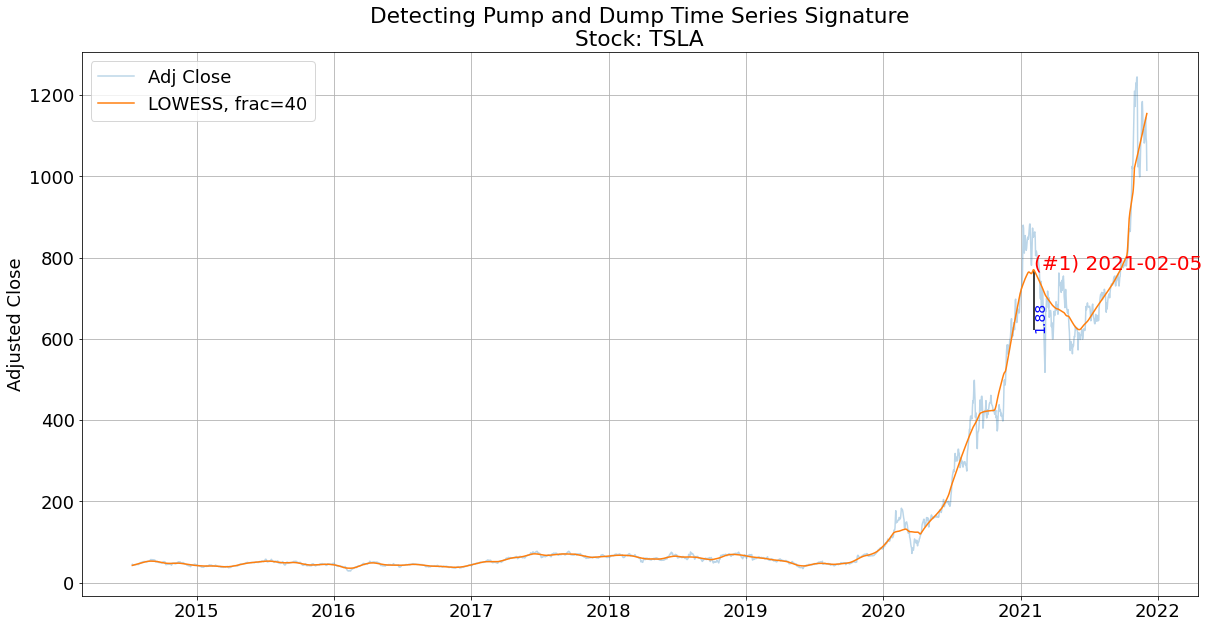

In [ ]:
plt.rcParams['font.size'] = 18
fig, ax = plt.subplots(figsize = (20,10))

_ = ax.plot(df.index, df['Adjusted_Close'], label = 'Adj Close', alpha=0.3)
_ = ax.plot(df.index, df['lowess40'], label = f'LOWESS, frac={LOWESS_FRAC}')

# Plot PumpNDump Statistic: Prominence Height/Half_Width
for index, arow in prom_width_df.iterrows():
  # print(f'{arow}')
  # _ = plt.hlines(arow['width_y_val'], arow['datetime'] - timedelta(days=arow['width_x_start']/2),
  #                arow['datetime'] + timedelta(days=arow['width_x_end']/2), color="C2")
  _ = plt.vlines(x=arow['datetime'], ymin=arow['prom_y_bottom'], ymax=arow['prom_y_top'])  # , label=arow['ratio_prom2halfwidth'])
  _ = plt.text(arow['datetime'],arow['prom_y_bottom'],f"{arow['ratio_prom2halfwidth']:.2f}",rotation=90, fontsize=14, color='blue')
  _ = plt.text(arow['datetime'],arow['prom_y_top'],f"(#{int(arow['rank_prom2halfwidth'])}) {arow['datetime'].strftime('%Y-%m-%d')}",rotation=0, fontsize=20, color='red')
  # _ = plt.annotate(f"Rank=arow['ratio_prom2halfwidth']", xy=(20, 40), xytext=(50, 15), fontsize=12)
  # arrowprops=dict(arrowstyle="->"),fontsize=16)

_ = ax.legend(loc='best')
_ = ax.grid(True)
ax.set_ylabel('Adjusted Close')
ax.set_title(f'Detecting Pump and Dump Time Series Signature\nStock: {stock_name}')

_ = plt.show();

## Interactive Plotly

In [ ]:
# Create a scatter plot

# _ = fig = px.scatter(df, x='sentence_no', y=selected_model.value, custom_data=['text_raw'], opacity=0.3, color_discrete_sequence=['black']) # , size=1)
_ = fig = px.scatter(df, x=df.index, y=['Adjusted_Close'], custom_data=['Open','High','Low','Close'], opacity=0.9) # , color_discrete_sequence=['black']) # , size=1)

# Add the prediction line
# fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Linear Regression', line=dict(color='limegreen')))
_ = fig.add_traces(go.Scatter(x=df.index, y=df['lowess40'], name=f'LOWESS, frac={LOWESS_FRAC}', line=dict(color='red')))
# _ = fig.add_traces(go.Scatter(x=df['Date'], y=y_hat2[:,1], name='LOWESS, frac=1/30', line=dict(color='orange')))

# _ = fig.add_traces(go.Scatter(x=df['sentence_no'], y=df['lowess20'], name='LOWESS, frac=1/20', line=dict(color='red')))
# _ = fig.add_traces(go.Scatter(x=df['sentence_no'], y=df['lowess30'], name='LOWESS, frac=1/30', line=dict(color='orange')))

# _ = fig.add_traces(px.scatter(df, x='sentence_no', y='lowess20', custom_data=['text_raw'])) #, name='LOWESS, frac=1/20', line=dict(color='red')))
# _ = fig.add_traces(px.scatter(df, x='sentence_no', y='lowess30', custom_data=['text_raw'])) #, name='LOWESS, frac=1/30', line=dict(color='orange')))


# _ = fig.add_traces(go.Scatter(x=df['sentence_no'], y=df['sma'], name=f'SMA, {selected_sma_window.value}%', line=dict(color='green'), opacity=0.1)) # , opacity=0.4, color_discrete_sequence=['green']))

# Change chart background color
# _ = fig.update_layout(dict(plot_bgcolor = 'white'))


# Change chart background color
_ = fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
_ = fig.update_xaxes(showgrid=True, 
                     gridwidth=1, 
                     gridcolor='lightgrey',
                     zeroline=True, 
                     zerolinewidth=1, 
                     zerolinecolor='lightgrey',
                     showline=True,
                     linewidth=1, 
                     linecolor='black',
                     showspikes = True,
                     spikemode  = 'across',
                     spikesnap = 'cursor')

_ = fig.update_yaxes(showgrid=True,
                     gridwidth=1,
                     gridcolor='lightgrey',
                     zeroline=True,
                     zerolinewidth=1,
                     zerolinecolor='lightgrey',
                     showline=True,
                     linewidth=1,
                     linecolor='black')

# Set figure title
# title_str = global_vars.corpus_titles_dt[selected_text.value][0]
title_full_str = f'{stock_name} Pump and Dump Signature (LOWESS frac={LOWESS_FRAC:.2f})'

# Update marker size
_ = fig.update_traces(marker=dict(size=1))

# title_str = f'Sentiment Arc: {title_str}<br>{selected_model.value} with {selected_sma_window.value}% SMA'

_ = fig.update_layout(
    plot_bgcolor='white',
    title=dict(text=title_full_str, y=0.95, x=0.5, xanchor='center', yanchor='bottom'), # font=dict(color='black')),
    xaxis_title="Date",
    yaxis_title='Adjusted Close',
    xaxis=dict(showgrid=True), 
    yaxis=dict(showgrid=True),
    showlegend = True,
    hovermode  = 'x',
    legend=dict(
    title = "Models:",
    orientation="h",
    xanchor="center",
    yanchor="bottom",
    y=-0.3, # 0.99,
    x=0.5 # x=0.01
))

_ = fig.update_traces(
    hovertemplate="<br>".join([
        "Date: %{x}",
        "Closing: %{y}",
        "Open: %{customdata[0]}",
        "High: %{customdata[1]}",
        "Low: %{customdata[2]}",
        "Close: %{customdata[3]}",
    ])
)

fig.show()

# **[END OF NOTEBOOK]**